In [1]:
%matplotlib inline

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import convolve
from collections import Counter
import re
import nltk # natural language toolkit
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Working with images

In [3]:
tiger_image = imread("tiger.jpg")

In [4]:
tiger_image.shape # H, W, Channels

(600, 580, 3)

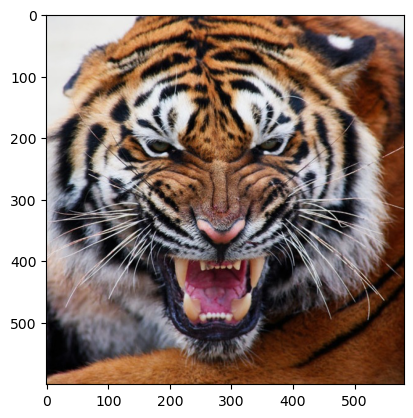

In [5]:
plt.imshow(tiger_image)
plt.show()

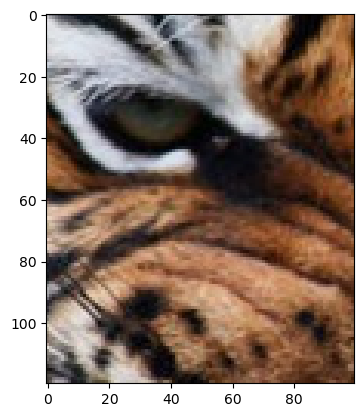

In [6]:
plt.imshow(tiger_image[180:300, 150:250, :]) # All channels

In [7]:
# Getting a single channel

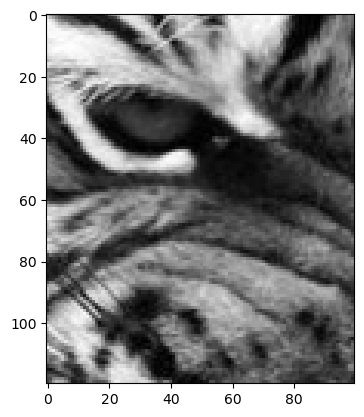

In [8]:
plt.imshow(tiger_image[180:300, 150:250, 1], cmap="gray") # Manipulating the red channel, colormap

In [9]:
tiger_image.min(), tiger_image.max() # The min and max values 

(0, 255)

### Getting the channel values

In [10]:
for channel in [0, 1, 2]:
    print(f"Channel {channel}, min: {tiger_image[:,:, channel].min()}, max: {tiger_image[:,:, channel].max()}")

Channel 0, min: 0, max: 255
Channel 1, min: 0, max: 255
Channel 2, min: 0, max: 255


In [11]:
red = tiger_image[:, :, 0]
green = tiger_image[:, :, 1]
blue = tiger_image[:, :, 2]

In [12]:
red

array([[223, 223, 223, ..., 225, 225, 225],
       [223, 223, 223, ..., 225, 225, 225],
       [224, 224, 224, ..., 226, 226, 226],
       ...,
       [199, 197, 198, ...,  80,  79,  79],
       [186, 185, 183, ...,  83,  82,  82],
       [175, 172, 169, ...,  84,  84,  83]], dtype=uint8)

In [13]:
red.ravel()

array([223, 223, 223, ...,  84,  84,  83], dtype=uint8)

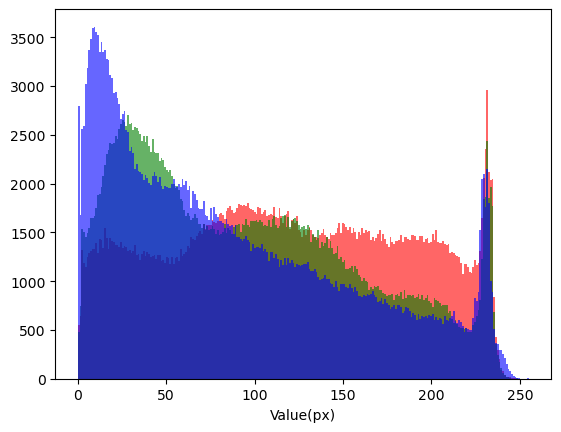

In [14]:
plt.hist(red.ravel(), bins=256, color="r", alpha=0.6)
plt.hist(green.ravel(), bins=256, color="g", alpha=0.6)
plt.hist(blue.ravel(), bins=256, color="b", alpha=0.6)
plt.xlabel("Value(px)")

plt.show()

In [15]:
blue.mean()

87.46468390804597

In [16]:
blue.max() / blue.std(ddof=1) # Peak signal to noise ration

3.7436569874162764

## Red to green

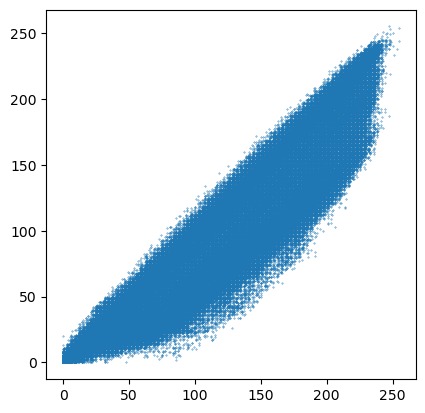

In [17]:
plt.scatter(red.ravel(), green.ravel(), s=0.1)
plt.gca().set_aspect("equal")
plt.show()

In [18]:
tiger_grayscale = 0.299 * red + 0.587 * green + 0.114 * blue

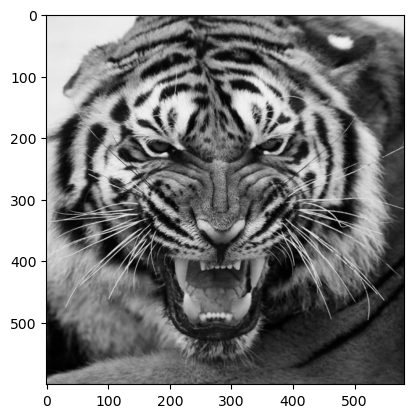

In [19]:
plt.imshow(tiger_grayscale, cmap="gray") # Human eye sense
plt.show()

## Convolution

In [20]:
kernel = np.ones((3, 3)) / 9.0

In [21]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [22]:
tiger_grayscale[0:3, 0:3]

array([[223.929, 223.929, 223.929],
       [223.929, 223.929, 223.929],
       [224.929, 224.929, 224.929]])

In [23]:
(tiger_grayscale[0:3, 0:3] * kernel).sum() # Sum of data * weight coeficients

224.26233333333334

In [24]:
tiger_convolve = convolve(tiger_grayscale, kernel) # Dimming the detail

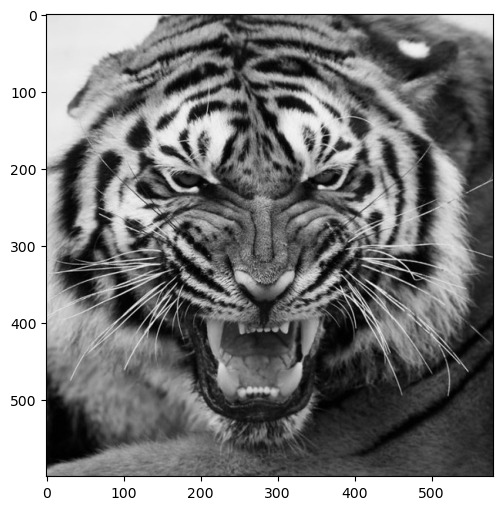

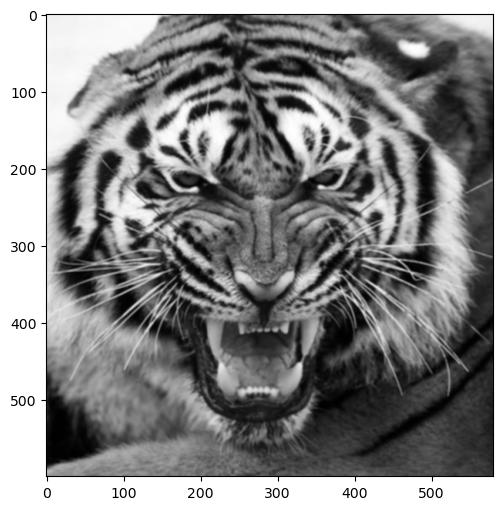

In [25]:
plt.figure(figsize = (6, 6))
plt.imshow(tiger_grayscale, cmap="gray")
plt.show()

plt.figure(figsize = (6, 6))
plt.imshow(tiger_convolve, cmap="gray")
plt.show()

## Image morphology

In [26]:
tiger_bw = tiger_grayscale.copy()

In [27]:
tiger_bw[tiger_bw > 90] = 255
tiger_bw[tiger_bw <= 90] = 0

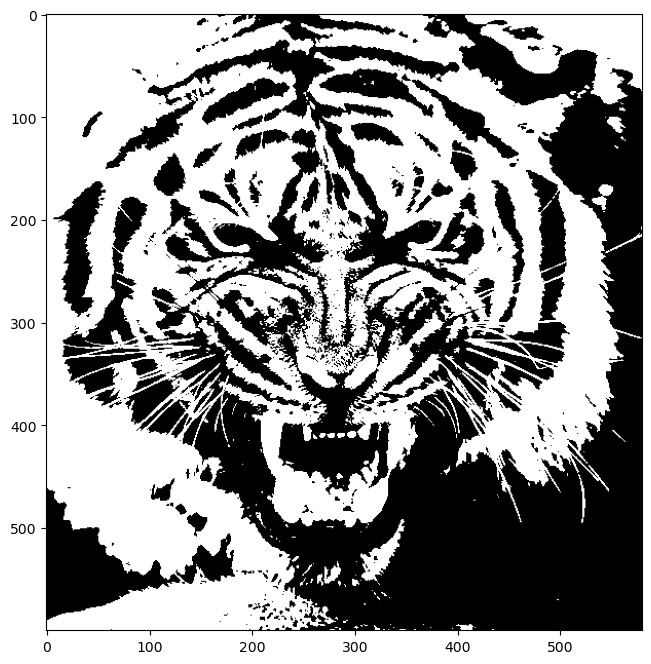

In [28]:
plt.figure(figsize = (8, 8))
plt.imshow(tiger_bw, cmap="gray")
plt.show()

## Natural Language - Text processing

In [35]:
with open("alice.txt", errors="ignore") as file:
    text = file.read()


In [36]:
text


"\n\n\nProject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice's Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nRelease Date: June 25, 2008 [EBook #11]\nLast Updated: October 6, 2016\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\n\n\n\nProduced by Arthur DiBianca and David Widger\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nALICEâ€™S ADVENTURES\nIN WONDERLAND\n\n\nBy Lewis Carroll\n\n\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\n\nContents\nCHAPTER I. \tDown the Rabbit-Hole\nCHAPTER II. \tThe Pool of Tears\nCHAPTER III. \tA Caucus-Race and a Long Tale\nCHAPTER IV. \tThe Rabbit Sends in a Little Bill\nCHAPTER V. \tAdv

In [39]:
count_elements = Counter(text)

In [40]:
count_elements


Counter({'\n': 2266,
         'P': 183,
         'r': 6481,
         'o': 9348,
         'j': 222,
         'e': 15243,
         'c': 2843,
         't': 11754,
         ' ': 29580,
         'G': 182,
         'u': 3926,
         'n': 7926,
         'b': 1638,
         'g': 2766,
         "'": 4,
         's': 7054,
         'A': 674,
         'l': 5111,
         'i': 7881,
         'd': 5275,
         'v': 945,
         'W': 231,
         'a': 9172,
         ',': 2566,
         'y': 2489,
         'L': 116,
         'w': 2725,
         'C': 185,
         'T': 487,
         'h': 7669,
         'B': 119,
         'k': 1209,
         'f': 2259,
         'm': 2272,
         '.': 1217,
         'Y': 100,
         'p': 1805,
         '-': 223,
         ':': 255,
         'R': 167,
         'D': 216,
         'J': 13,
         '2': 11,
         '5': 13,
         '0': 21,
         '8': 11,
         '[': 3,
         'E': 198,
         '#': 1,
         '1': 66,
         ']': 3,
         'U': 64

In [42]:
count_elements.most_common(15)

[(' ', 29580),
 ('e', 15243),
 ('t', 11754),
 ('o', 9348),
 ('a', 9172),
 ('n', 7926),
 ('i', 7881),
 ('h', 7669),
 ('s', 7054),
 ('r', 6481),
 ('d', 5275),
 ('l', 5111),
 ('u', 3926),
 ('â', 3283),
 ('€', 3283)]

In [43]:
symbols = [symbol for symbol, count in count_elements.most_common(20)]
counts = [count for symbol, count in count_elements.most_common(20)]

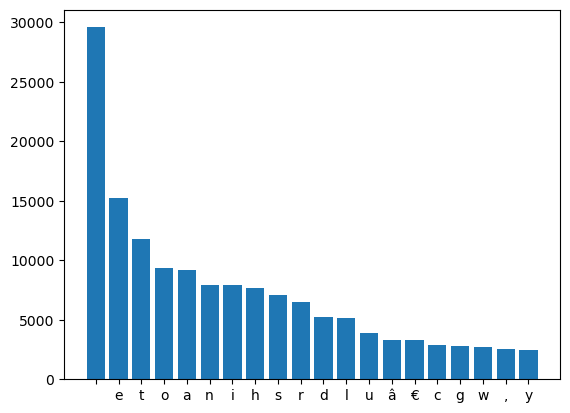

In [45]:
plt.bar(symbols, counts)
plt.show()

### Tokenization

In [48]:
words = re.split("\\W+", text)

In [69]:
words = [word.lower().strip() for word in words]
words = [word for word in words if not word.isdigit()]

In [70]:
Counter(words).most_common(50)

[('â', 2370),
 ('the', 1822),
 ('and', 941),
 ('to', 806),
 ('a', 693),
 ('of', 631),
 ('it', 541),
 ('she', 541),
 ('said', 459),
 ('in', 432),
 ('you', 430),
 ('i', 400),
 ('alice', 389),
 ('was', 358),
 ('that', 294),
 ('as', 274),
 ('her', 248),
 ('at', 227),
 ('with', 227),
 ('s', 220),
 ('t', 217),
 ('on', 204),
 ('all', 200),
 ('this', 181),
 ('for', 179),
 ('had', 178),
 ('but', 175),
 ('be', 165),
 ('not', 165),
 ('or', 155),
 ('so', 151),
 ('very', 145),
 ('iâ', 136),
 ('what', 134),
 ('they', 131),
 ('little', 128),
 ('is', 127),
 ('he', 123),
 ('out', 118),
 ('if', 115),
 ('one', 104),
 ('down', 102),
 ('up', 102),
 ('about', 102),
 ('no', 100),
 ('do', 98),
 ('his', 96),
 ('then', 91),
 ('gutenberg', 87),
 ('have', 85)]

In [71]:
# Removing stopwords

In [72]:
stopwords = set(nltk.corpus.stopwords.words("english"))

In [73]:
words_cleaned = [word for word in words if word not in stopwords]

In [74]:
Counter(words_cleaned)

Counter({'': 2,
         'project': 82,
         'gutenberg': 87,
         'alice': 389,
         'adventures': 11,
         'wonderland': 8,
         'lewis': 4,
         'carroll': 4,
         'ebook': 9,
         'use': 31,
         'anyone': 5,
         'anywhere': 3,
         'cost': 4,
         'almost': 8,
         'restrictions': 2,
         'whatsoever': 2,
         'may': 28,
         'copy': 12,
         'give': 16,
         'away': 28,
         'terms': 22,
         'license': 16,
         'included': 3,
         'online': 4,
         'www': 6,
         'org': 13,
         'title': 1,
         'author': 1,
         'release': 1,
         'date': 3,
         'june': 1,
         'last': 34,
         'updated': 2,
         'october': 1,
         'language': 1,
         'english': 7,
         'character': 2,
         'set': 23,
         'encoding': 1,
         'utf': 1,
         'start': 3,
         'produced': 4,
         'arthur': 2,
         'dibianca': 2,
         'david': 

In [76]:
# Stemming
stemmer = nltk.stem.porter.PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words_cleaned]

## Multiple texts

In [79]:
groups_data = fetch_20newsgroups()["data"]

In [83]:
texts = [groups_data[0].split("\n\n")[1].strip() for text in groups_data]

### Pre-processing with sk countvectorizer

In [89]:
count_vectorizer = CountVectorizer(stop_words=stopwords)

In [90]:
count_vectorizer.fit(texts)

CountVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [93]:
count_vectorizer.transform(texts).todense()

matrix([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [94]:
# count_vectorizer.vocabulary_ 

{'wondering': 39,
 'anyone': 3,
 'could': 9,
 'enlighten': 15,
 'car': 8,
 'saw': 32,
 'day': 10,
 'door': 11,
 'sports': 36,
 'looked': 22,
 'late': 21,
 '60s': 0,
 'early': 13,
 '70s': 1,
 'called': 7,
 'bricklin': 5,
 'doors': 12,
 'really': 30,
 'small': 34,
 'addition': 2,
 'front': 16,
 'bumper': 6,
 'separate': 33,
 'rest': 31,
 'body': 4,
 'know': 20,
 'tellme': 37,
 'model': 26,
 'name': 27,
 'engine': 14,
 'specs': 35,
 'years': 40,
 'production': 29,
 'made': 24,
 'history': 18,
 'whatever': 38,
 'info': 19,
 'funky': 17,
 'looking': 23,
 'please': 28,
 'mail': 25}

## Term frequency - inverse document frequency - TF-IDF algorithm
### High/Low score -> high - rare and specific words , low - words that occur in nearly all documents
### Stopwords for each article sklearn

In [103]:
tfidf = TfidfVectorizer(stop_words = stopwords, min_df=3, ngram_range=(1, 3)) # min_df - Minimum in 3 documents, combinations of words

In [104]:
transformed_texts = tfidf.fit_transform(texts)

In [105]:
transformed_texts

<11314x128 sparse matrix of type '<class 'numpy.float64'>'
	with 1448192 stored elements in Compressed Sparse Row format>